In [1]:
#reading the files
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
features = pd.read_csv("Features data set.csv")
sales = pd.read_csv("sales data-set.csv")
stores = pd.read_csv("stores data-set.csv")

In [3]:
data = pd.merge(sales , features, on = ['Store','Date', 'IsHoliday'] , how = 'left')
data = pd.merge(data , stores , on = ['Store'] , how = 'left')

In [4]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [5]:
#from dplython import (DplyFrame, X, diamonds, select, sift, sample_n,
   # sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction)

In [6]:
#dividing into hierarchies
Type_C= data[data["Type"]=='C']

In [7]:
Type_C.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
286548,30,1,05/02/2010,10158.77,False,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,C,42988
286549,30,1,12/02/2010,14346.05,True,37.77,2.548,NaN,NaN,NaN,NaN,NaN,210.897994,8.324,C,42988
286550,30,1,19/02/2010,12321.18,False,39.75,2.514,NaN,NaN,NaN,NaN,NaN,210.945160,8.324,C,42988
286551,30,1,26/02/2010,10099.28,False,45.31,2.561,NaN,NaN,NaN,NaN,NaN,210.975957,8.324,C,42988
286552,30,1,05/03/2010,9719.90,False,48.61,2.625,NaN,NaN,NaN,NaN,NaN,211.006754,8.324,C,42988


In [8]:
Type_C.Store.unique()

array([30, 37, 38, 42, 43, 44])

In [9]:
#Type C
Type_C1=Type_C.drop(["Dept","Store","IsHoliday","Temperature","Fuel_Price","MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment","Size","Type",],axis=1)
Type_C1.head()

,Date,Weekly_Sales
286548,05/02/2010,10158.77
286549,12/02/2010,14346.05
286550,19/02/2010,12321.18
286551,26/02/2010,10099.28
286552,05/03/2010,9719.90


In [10]:
export_csv = Type_C1.to_csv (r'data_newC.csv', index = None, header=True)

In [11]:
# importing the data again
F_TypeC = pd.read_csv("data_newC.csv",index_col = [0], parse_dates = [0])
F_TypeC.head()

,Weekly_Sales
Date,
2010-05-02,10158.77
2010-12-02,14346.05
2010-02-19,12321.18
2010-02-26,10099.28
2010-05-03,9719.90


In [12]:
type(F_TypeC)

pandas.core.frame.DataFrame

In [13]:
F_TypeC.size

42597

In [14]:
F_TypeC = F_TypeC[0:10000]

In [15]:
series_value = F_TypeC.values

In [16]:
series_value

array([[10158.77],
       [14346.05],
       [12321.18],
       ...,
       [  114.21],
       [   66.3 ],
       [   59.48]])

In [17]:
type(series_value)

numpy.ndarray

In [18]:
F_TypeC.size

10000

In [19]:
F_TypeC.tail()

,Weekly_Sales
Date,
2012-06-07,137.71
2012-07-13,90.40
2012-07-20,114.21
2012-07-27,66.30
2012-03-08,59.48


In [20]:
F_TypeC.describe()

,Weekly_Sales
count,10000.000000
mean,7560.962646
std,12795.259278
min,-26.610000
25%,117.605000
50%,1099.410000
75%,11740.062500
max,80457.010000


In [21]:
F_TypeC.info

<bound method DataFrame.info of             Weekly_Sales
Date                    
2010-05-02      10158.77
2010-12-02      14346.05
2010-02-19      12321.18
2010-02-26      10099.28
2010-05-03       9719.90
...                  ...
2012-06-07        137.71
2012-07-13         90.40
2012-07-20        114.21
2012-07-27         66.30
2012-03-08         59.48

[10000 rows x 1 columns]>

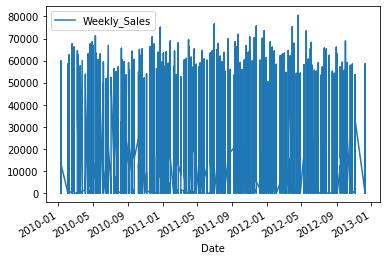

In [22]:
F_TypeC.plot()

In [23]:
F_TypeC_mean = F_TypeC.rolling(window = 10).mean()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

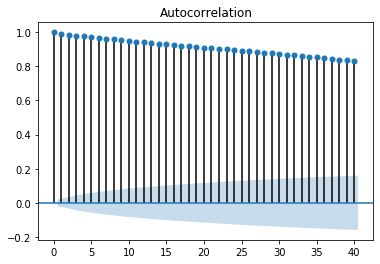

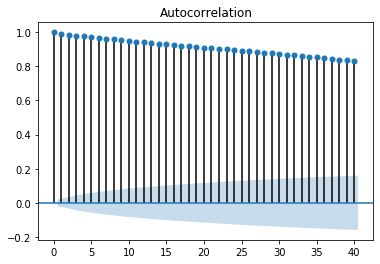

In [25]:
plot_acf(F_TypeC)

means mean, variance & covariance is constant over period of time

## Converting series to stationary

In [27]:
F_TypeC.head()

,Weekly_Sales
Date,
2010-05-02,10158.77
2010-12-02,14346.05
2010-02-19,12321.18
2010-02-26,10099.28
2010-05-03,9719.90


In [28]:
F_TypeC.shift(1)

,Weekly_Sales
Date,
2010-05-02,NaN
2010-12-02,10158.77
2010-02-19,14346.05
2010-02-26,12321.18
2010-05-03,10099.28
...,...
2012-06-07,149.33
2012-07-13,137.71
2012-07-20,90.40


In [29]:
TypeC_diff = F_TypeC.diff(periods=1)
#integrated of order 1 (1 lag)
#denoted by d (for difference)
#one of the parameter of ARIMA

In [30]:
#removing the NaN value
TypeC_diff = TypeC_diff[1:]
TypeC_diff.head()

,Weekly_Sales
Date,
2010-12-02,4187.28
2010-02-19,-2024.87
2010-02-26,-2221.90
2010-05-03,-379.38
2010-12-03,840.59


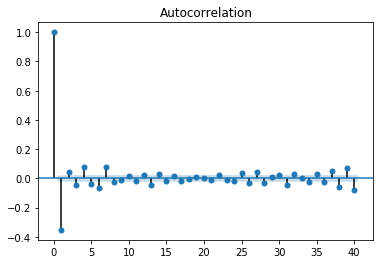

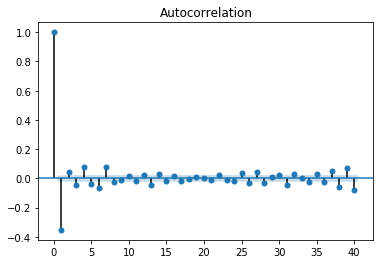

In [31]:
plot_acf(TypeC_diff)

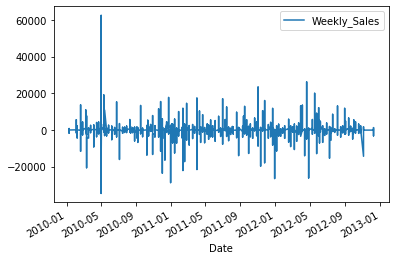

In [32]:
TypeC_diff.plot()

In [33]:
X = F_TypeC.values
train = X[0:9000] #9000 data as train data
test = X[9000:] #1000 data as test data

predictions = []

In [34]:
test.size

1000

In [35]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [36]:
#p,d,q
model_arima = ARIMA(train,order=(2,1,1))
model_arima_fit = model_arima.fit()

#AIC value
print(model_arima_fit.aic)

162018.7463181614


In [37]:
predictions = model_arima_fit.forecast(steps=1000)[0]
predictions

array([17311.6211332 , 17235.90345322, 17260.29165586, 17257.79801172,
       17259.47204177, 17260.06559496, 17260.83216899, 17261.55524498,
       17262.28548672, 17263.01397476, 17263.74275897, 17264.47147238,
       17265.20019801, 17265.92892078, 17266.65764406, 17267.38636722,
       17268.1150904 , 17268.84381357, 17269.57253675, 17270.30125992,
       17271.0299831 , 17271.75870627, 17272.48742945, 17273.21615263,
       17273.9448758 , 17274.67359898, 17275.40232215, 17276.13104533,
       17276.8597685 , 17277.58849168, 17278.31721486, 17279.04593803,
       17279.77466121, 17280.50338438, 17281.23210756, 17281.96083073,
       17282.68955391, 17283.41827709, 17284.14700026, 17284.87572344,
       17285.60444661, 17286.33316979, 17287.06189296, 17287.79061614,
       17288.51933932, 17289.24806249, 17289.97678567, 17290.70550884,
       17291.43423202, 17292.16295519, 17292.89167837, 17293.62040155,
       17294.34912472, 17295.0778479 , 17295.80657107, 17296.53529425,
      

Text(0.5, 0, 'Timeseries')

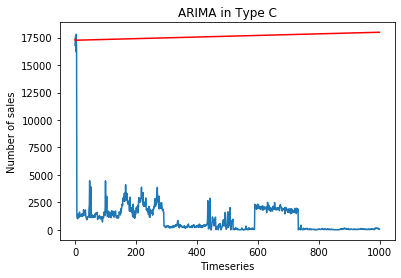

In [40]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA in Type C")
plt.ylabel('Number of sales')
plt.xlabel('Timeseries')

In [39]:
mean_squared_error(test,predictions)

278600863.4995443